In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Vehicle:
    def __init__(self, position, speed, max_speed, length, width, braking_prob):
        self.position = position
        self.speed = speed
        self.max_speed = max_speed
        self.length = length
        self.width = width
        self.braking_prob = braking_prob

    def accelerate(self):
        if self.speed < self.max_speed:
            self.speed += 1

    def decelerate(self, headway_distance):
        if self.speed > headway_distance:
            self.speed = headway_distance  # reduce speed equivalent to headway distance

    def random_brake(self, braking_prob):
        if np.random.rand() < braking_prob and self.speed > 0:
            self.speed -= 1

In [4]:
class Road:
    def __init__(self, length, width, max_speed, production_prob):
        self.length = length
        self.width = width
        self.max_speed = max_speed
        self.production_prob = production_prob
        self.vehicles = []

    def headway_distance(self, the_vehicle):
        distance = []
        for other_vehicle in self.vehicles:
            if other_vehicle.position > the_vehicle.position + the_vehicle.length:
                distance.append(other_vehicle.position - (the_vehicle.position + the_vehicle.length))
        return min(distance, default=self.length - (the_vehicle.position + the_vehicle.length))
    
    def produce_vehicles(self, production_prob):
        if np.random.rand() < self.production_prob:
            vehicle_length = np.random.choice([1, 2, 5, 9])
            if vehicle_length == 1:
                vehicle_width = 1
            else:
                vehicle_width = 2
            if all(road_portion is None for road_portion in self.vehicles[0:vehicle_length]):         
                new_vehicle = Vehicle(0, np.random.randint(1, self.max_speed + 1), self.max_speed, 
                                      vehicle_length, vehicle_width, braking_prob=0.1)
                self.vehicles.append(new_vehicle)
            else:
                pass

    def remove_vehicles(self):
        self.vehicles = [vehicle for vehicle in self.vehicles if vehicle.position != self.length-1]

    def update(self):
        new_vehicles = []
        for vehicle in self.vehicles:
            headway = self.headway_distance(vehicle)
            vehicle.accelerate()
            vehicle.decelerate(headway)
            vehicle.random_brake(braking_prob=0.5)
            new_position = vehicle.position + vehicle.speed
            if new_position < self.length: 
                vehicle.position = new_position
                new_vehicles.append(vehicle)
        self.vehicles = new_vehicles
        self.produce_vehicles(self.production_prob)
        self.remove_vehicles()

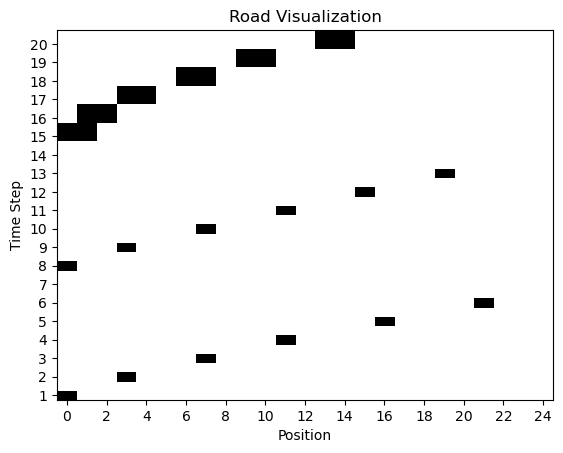

In [5]:
# Example usage (To be transferred to another notebook)
def visualize_road(road, T):
    '''This method visualizes road configuration for T timesteps'''
    '''Timestep number and row indices are two different things here'''
    '''In the array of zeros representing the road, current_row_index = road_width*timestep'''
    road_states = np.zeros((T * road.width, road.length)) #Generate a 2D array (Timestep*roadwidth, length)
    for timestep in range(T):
        road.update() #Updates the road for each timestep
        for vehicle in road.vehicles:
            for j in range(vehicle.length):
                if vehicle.position + j < road.length:
                    road_states[timestep * 2:(timestep * 2) + (vehicle.width), vehicle.position + j] = 1                    
                    '''Timestep represents the current timestep
                    Timestep*2 calculates the starting row index for the current timestep
                    (Timestep*2)+ (vehicle.width-1) calculates the ending row index for current timestep'''
    plt.imshow(road_states, cmap='binary', aspect='auto', origin='lower')
    plt.xticks(range(0, road.length, 2))
    plt.yticks(range(0, T * 2, 2), range(1, T + 1))
    plt.xlabel('Position')
    plt.ylabel('Time Step')
    plt.title('Road Visualization')
    plt.show()

road_length = 25
road_width = 2
max_speed = 5
production_prob = 0.99
T = 20
road = Road(road_length, road_width, max_speed, production_prob)
visualize_road(road, T)